In [2]:
import pandas as pd
import numpy as np

In [112]:
courses = pd.read_csv('datasets/courses.csv')
students = pd.read_csv('datasets/students.csv')
nov = pd.read_csv('datasets/reg-month1.csv')
dec = pd.read_csv('datasets/reg-month2.csv')

# ipl
matches = pd.read_csv('datasets/matches.csv')
delivery = pd.read_csv('datasets/deliveries.csv')

In [81]:
# courses

# Learning

In [ ]:
# pd.concat
# df.concat
# ignore_index
# df.append
# mullitindex -> fetch using iloc
# concat dataframes horizontally

In [10]:
regs = pd.concat([nov,dec],ignore_index=True)
# regs

In [12]:
# nov.append(dec,ignore_index=True)

In [ ]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])
# Multiindex DataFrame
multi.loc[('Dec',4)]

student_id    14
course_id      9
Name: (Dec, 4), dtype: int64

In [14]:
# pd.concat([nov,dec],axis=1)

In [16]:
# inner join
# students.merge(regs,how='inner',on='student_id')

In [18]:
# left join
# courses.merge(regs,how='left',on='course_id')

In [ ]:
# right join
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})

students = pd.concat([students,temp_df],ignore_index=True)

In [ ]:
students.tail()

,student_id,name,partner
23,24,Radhika Suri,17
24,25,Shashank D’Alia,2
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,17


In [48]:
# students.merge(regs,how='right',on='student_id')

In [44]:
# regs.merge(students,how='left',on='student_id')

In [46]:
# outer join
# students.merge(regs,how='outer',on='student_id').tail(10)

## Practice Questions

In [169]:
# 1. find total revenue generated
pd.concat((nov,dec),ignore_index=True).merge(courses,on="course_id",how="inner")["price"].sum()

154247

In [95]:
# 2. find month by month revenue
dec_r = dec.merge(courses, on="course_id",how="outer")["price"].sum()
nov_r = nov.merge(courses, on="course_id",how="outer")["price"].sum()
print(dec_r,nov_r)

67070 91173


In [111]:
# 3. Print the registration table
# cols -> name -> course -> price
data = pd.concat((dec,nov),ignore_index=True).merge(courses,on="course_id").merge(students,on="student_id")
reg = data.loc[:,["name","course_name","price"]]

<Axes: xlabel='course_name'>

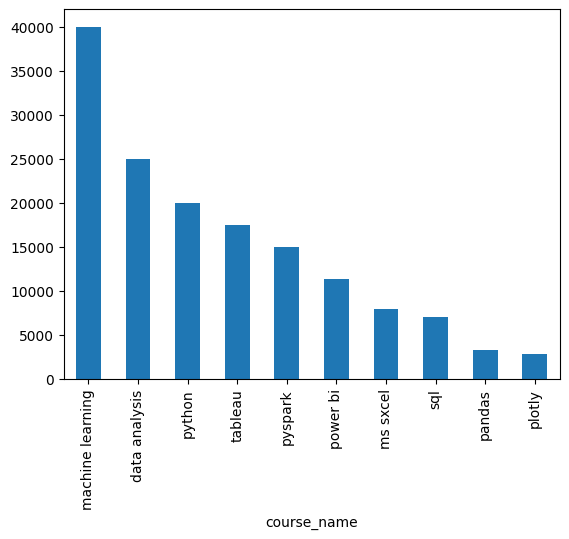

In [121]:
# 4. Plot bar chart for revenue/course
reg.groupby("course_name")["price"].sum().sort_values(ascending = False).plot(kind='bar')

In [186]:
# 5. find students who enrolled in both the months
common_students = np.intersect1d(dec['student_id'],nov['student_id'])
students[students['student_id'].isin(common_students)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [157]:
# 6. find course that got no enrollment
pd.concat((dec,nov),ignore_index=True).merge(courses,on= 'course_id',how="outer").groupby("course_name")[].count()

course_name
C++                 0
Numpy               0
data analysis       5
machine learning    4
ms sxcel            5
pandas              4
plotly              5
power bi            6
pyspark             6
python              9
sql                 2
tableau             7
Name: student_id, dtype: int64

In [216]:
# 2nd method 
no_enrol = np.setdiff1d(courses['course_id'],pd.concat((nov,dec))['course_id'])
courses[courses['course_id'].isin(no_enrol)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [228]:
# 7. find students who did not enroll into any courses
reg = pd.concat((dec,nov))
# reg.merge(courses,on="course_id",how="outer").merge(students,on="student_id",how="outer").isnull()

In [222]:
student_no = np.setdiff1d(students['student_id'],reg["student_id"])
students[students['student_id'].isin(student_no)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11


In [114]:
# 8. Print student name -> partner name for all enrolled students
# students[students['partner']-1]

students.merge(students,left_on="partner",right_on="student_id")[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


In [116]:
# 9. find top 3 students who did most number enrollments
reg = pd.concat((dec,nov))
student_course = reg.merge(students, on="student_id")
student_course.groupby(["name","student_id"]).size().sort_values(ascending = False).head(3)

name            student_id
Chhavi Lachman  23            6
Tarun Thaker    7             5
Radha Dutt      12            4
dtype: int64

In [120]:
# 10. find top 3 students who spent most amount of money on courses
student_course.merge(courses,on="course_id").groupby(["name","student_id"])["price"].sum().sort_values(ascending = False).head(3)

name              student_id
Chhavi Lachman    23            22594
Pranab Natarajan  14            15096
Qabeel Raman      19            13498
Name: price, dtype: int64

In [40]:
# Alternate syntax for merge
# students.merge(regs)

In [198]:
# IPL Problems

# find top 3 studiums with highest sixes/match ratio

In [42]:
# stadium -> sixes

In [130]:
ipl = matches.merge(delivery, left_on="id",right_on="match_id")

In [186]:
six_per_std = ipl[ipl['batsman_runs']==6].groupby("venue")["venue"].count().reset_index(name="six_count")

In [182]:
match_count = matches.groupby("venue")["venue"].count().reset_index(name="match_count")

In [192]:
SixPerMatch = match_count.merge(six_per_std,on="venue")
SixPerMatch["sixes/match ratio"] = SixPerMatch['six_count']/SixPerMatch['match_count']

In [196]:
SixPerMatch

,venue,match_count,six_count,sixes/match ratio
0,Barabati Stadium,7,68,9.714286
1,Brabourne Stadium,11,114,10.363636
2,Buffalo Park,3,27,9.000000
3,De Beers Diamond Oval,3,34,11.333333
4,Dr DY Patil Sports Academy,17,173,10.176471
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,11,129,11.727273
6,Dubai International Cricket Stadium,7,58,8.285714
7,Eden Gardens,61,594,9.737705
8,Feroz Shah Kotla,60,636,10.600000
9,Green Park,4,36,9.000000


In [200]:
# find orange cap holder of all the seasons

In [237]:
ipl.groupby(["season",'batsman'])["batsman_runs"].sum().sort_values(ascending = False).reset_index(name="all_runs").drop_duplicates(subset=["season"],keep="first")

,season,batsman,all_runs
0,2016,V Kohli,973
2,2013,MEK Hussey,733
3,2012,CH Gayle,733
6,2014,RV Uthappa,660
7,2017,DA Warner,641
9,2010,SR Tendulkar,618
10,2008,SE Marsh,616
11,2011,CH Gayle,608
14,2009,ML Hayden,572
17,2015,DA Warner,562
